# Hotel Brands – First Exploration
Quick helper-driven pass over the individual-level Hotel Brands survey export.

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from helper import (
    count_nulls,
    ajr_plot_histograms,
    ajr_plot_correlations,
    ajr_correlation_heatmap,
)

plt.style.use("seaborn-v0_8-whitegrid")
pd.options.display.float_format = "{:,.2f}".format


In [2]:
DATA_PATH = Path("data/Hotel Brands_raw_data_indiv_lvl.csv")
NA_VALUES = ["#NULL!", "NULL"]

df = pd.read_csv(DATA_PATH, na_values=NA_VALUES)
print(f"Loaded {df.shape[0]:,} rows and {df.shape[1]:,} columns from {DATA_PATH}")
df.head()


Loaded 385 rows and 441 columns from data/Hotel Brands_raw_data_indiv_lvl.csv


,StartDate,EndDate,Status,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,Q_RecaptchaScore,totalnights,...,SCRascend,SCRmerid,SCRsher,SCRwestin,SCRwynd,SCRdolce,SCRmarriott,SCRhyatt,SCRhilt,SCRemb
0,1/16/20 22:16,1/16/20 22:20,0,100.00,237.00,1,1/16/20 22:20,R_1qUS7Sta2jPMOi1,0.90,NaN,...,0.06,0.04,0.01,0.03,0.01,0.03,0.03,0.03,0.04,0.03
1,1/15/20 18:11,1/15/20 18:12,0,19.00,95.00,0,1/17/20 18:12,R_1CfgGpDe1JJWaeY,0.90,100.00,...,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,0.34,NaN
2,1/15/20 22:03,1/15/20 22:22,0,100.00,"1,109.00",1,1/15/20 22:22,R_2cbmKnt8yU6NtWB,0.10,228.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06
3,1/16/20 0:49,1/16/20 1:13,0,100.00,"1,489.00",1,1/16/20 1:13,R_3KO67z2x3hBoVQj,0.90,168.00,...,NaN,NaN,0.12,0.12,NaN,NaN,0.03,0.12,0.18,0.12
4,1/15/20 17:51,1/15/20 17:55,0,24.00,231.00,0,1/17/20 17:55,R_0VNtuuOPIzqy2M9,0.90,80.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33,0.33


In [3]:
null_overview = count_nulls(df)
null_overview.head(15)


,nulls,percent_missing
Q24_5_TEXT,378,0.98
Meridienpf,366,0.95
SCRmerid,366,0.95
SCRdolce,365,0.95
Indigopf,365,0.95
Dolcepf,365,0.95
SCRindigo,365,0.95
SCRascend,364,0.95
Ascendpf,364,0.95
SCRmain,362,0.94


In [4]:
nights_cols = ["totalnights", "busnights", "leisnights"]
nights_summary = df[nights_cols].describe().T
nights_summary


,count,mean,std,min,25%,50%,75%,max
totalnights,384.00,12.35,17.83,0.00,4.75,8.00,14.25,228.00
busnights,372.00,4.96,15.29,0.00,0.00,2.00,5.00,218.00
leisnights,384.00,7.55,8.50,0.00,3.00,6.00,10.00,100.00


In [5]:
scr_cols = ["SCRhyatt", "SCRhilt", "SCRemb"]
scr_summary = df[scr_cols]
scr_summary.describe().T


,count,mean,std,min,25%,50%,75%,max
SCRhyatt,97.00,0.22,0.21,0.02,0.07,0.15,0.30,1.00
SCRhilt,161.00,0.29,0.25,0.01,0.11,0.20,0.35,1.00
SCRemb,54.00,0.13,0.13,0.01,0.04,0.09,0.19,0.70


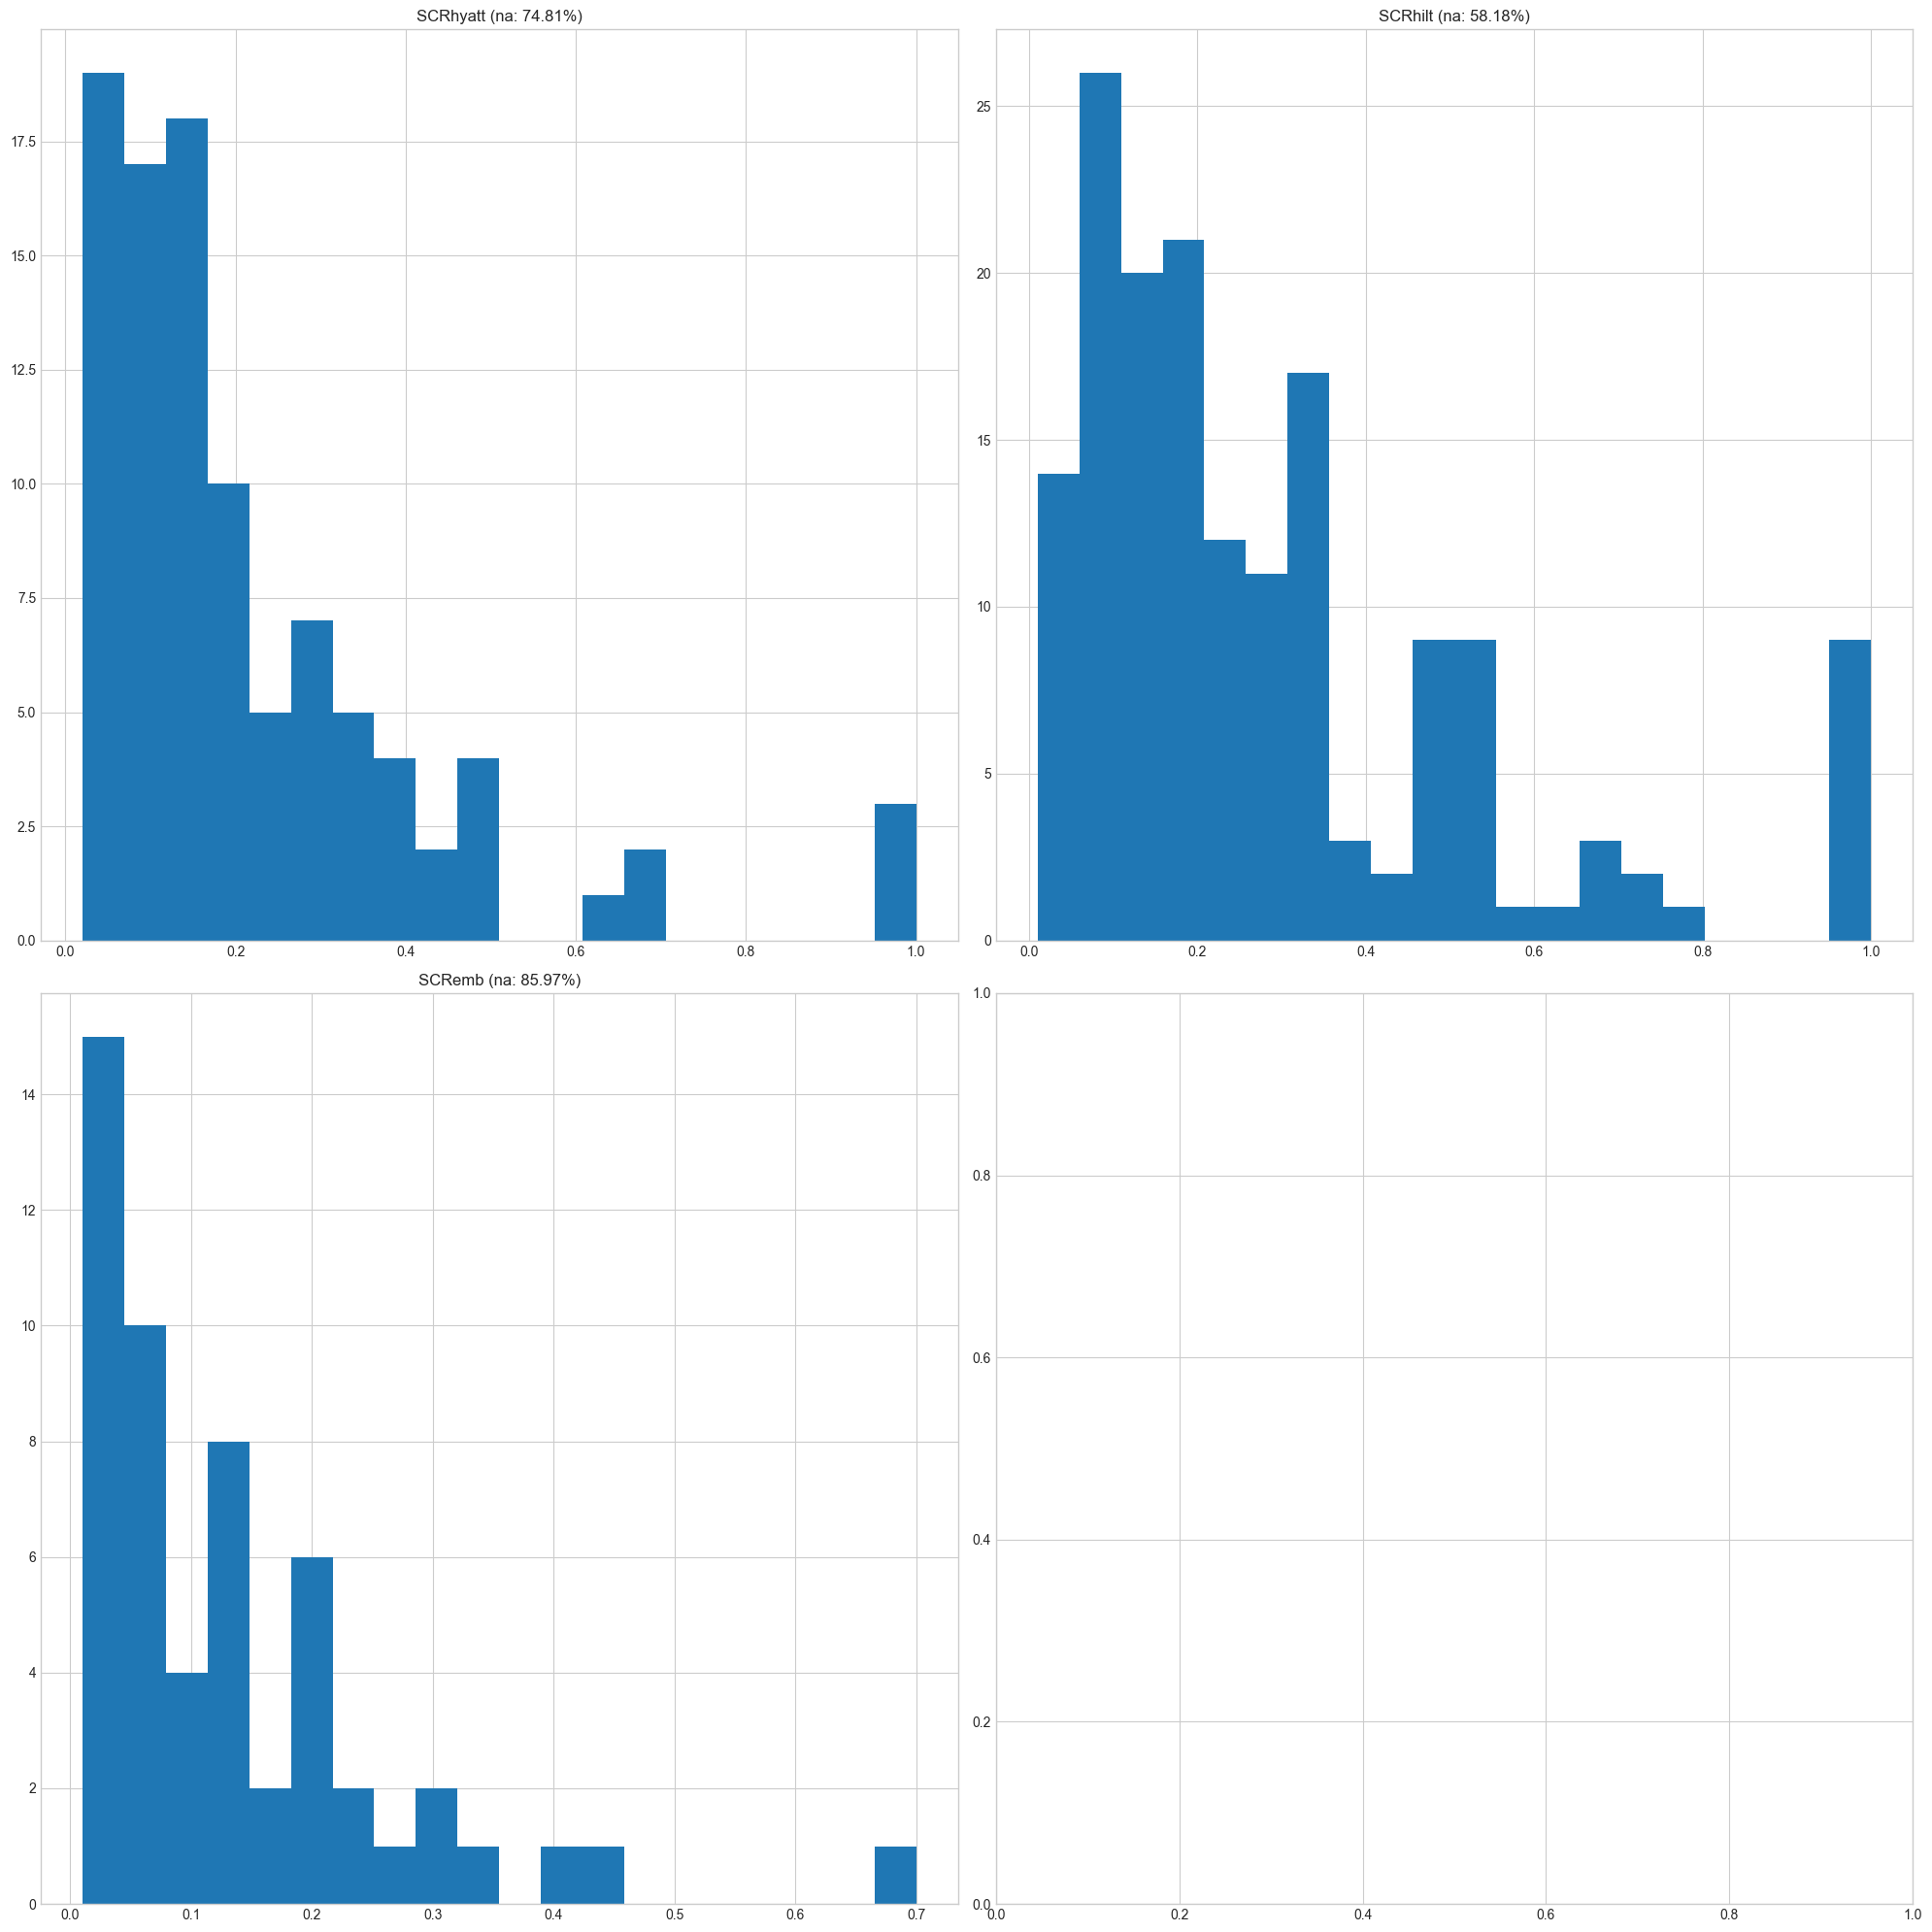

In [6]:
ajr_plot_histograms(df[scr_cols])


In [7]:
hyatt_cols = [
    "Hyattnights",
    "safeHyatt",
    "sucHyatt",
    "specHyatt",
    "cfreeHyatt",
    "welHyatt",
    "clHyatt",
    "wmHyatt",
    "pamHyatt",
    "SCRhyatt",
]
hyatt_df = df[hyatt_cols].dropna()
print(f"Hyatt complete cases: {len(hyatt_df)}")
hyatt_df.head()


Hyatt complete cases: 70


,Hyattnights,safeHyatt,sucHyatt,specHyatt,cfreeHyatt,welHyatt,clHyatt,wmHyatt,pamHyatt,SCRhyatt
0,3.00,5.00,6.00,4.00,4.00,5.00,6.00,5.00,4.00,0.03
3,4.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,0.12
7,3.00,3.00,4.00,5.00,5.00,6.00,4.00,3.00,5.00,0.15
10,2.00,6.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
15,3.00,5.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,0.13


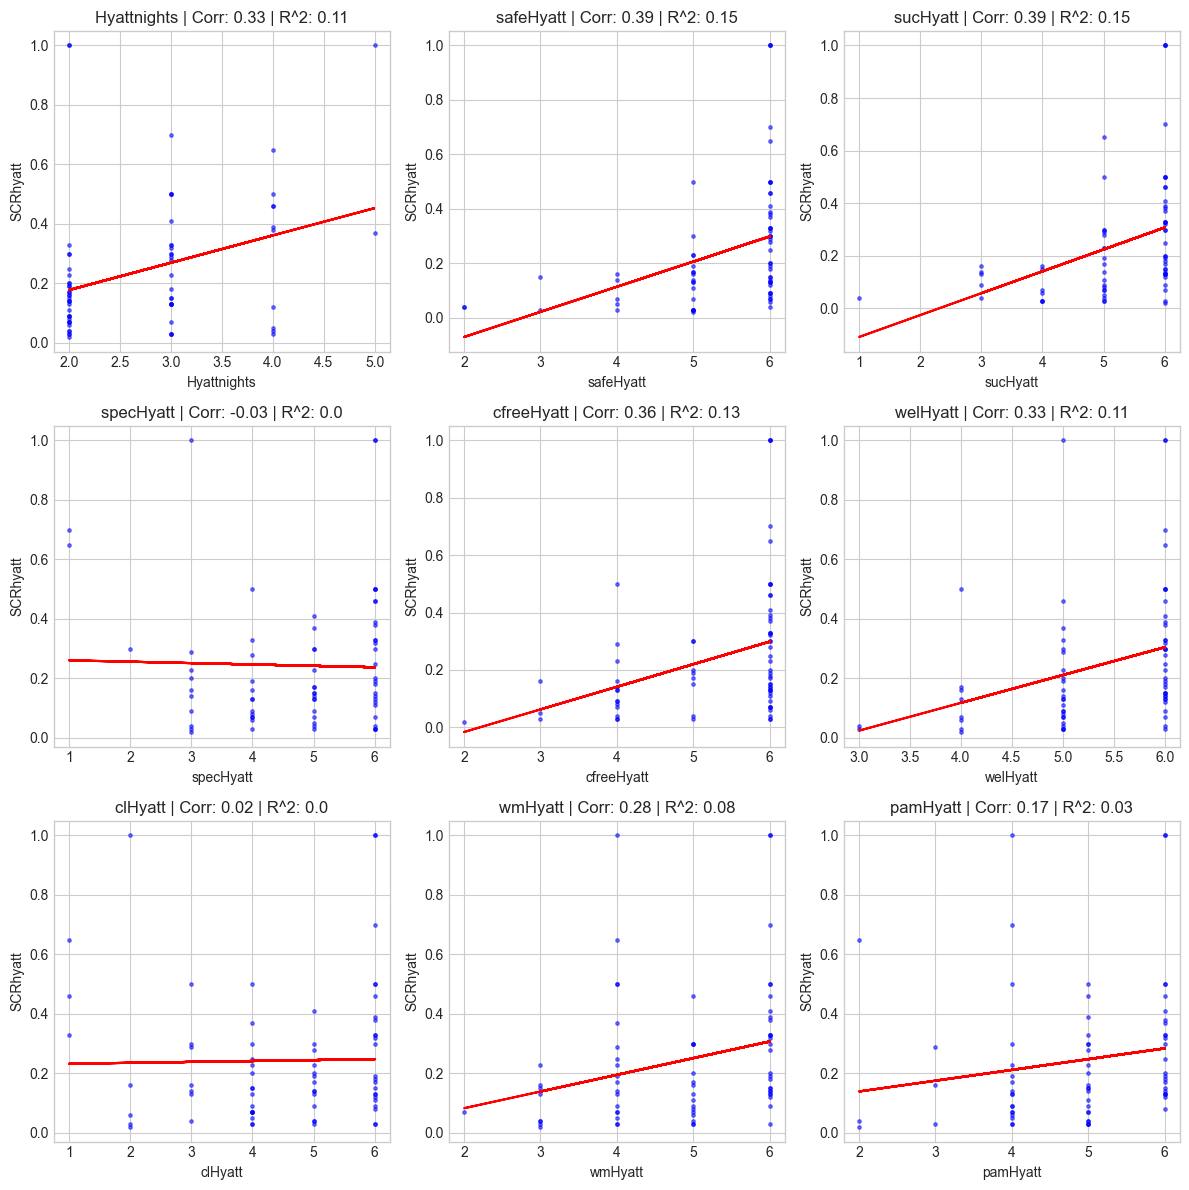

In [8]:
ajr_plot_correlations(hyatt_df, "SCRhyatt", fig_height=12, r_squared=True)


/Users/alexj/code/meridian/helper.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


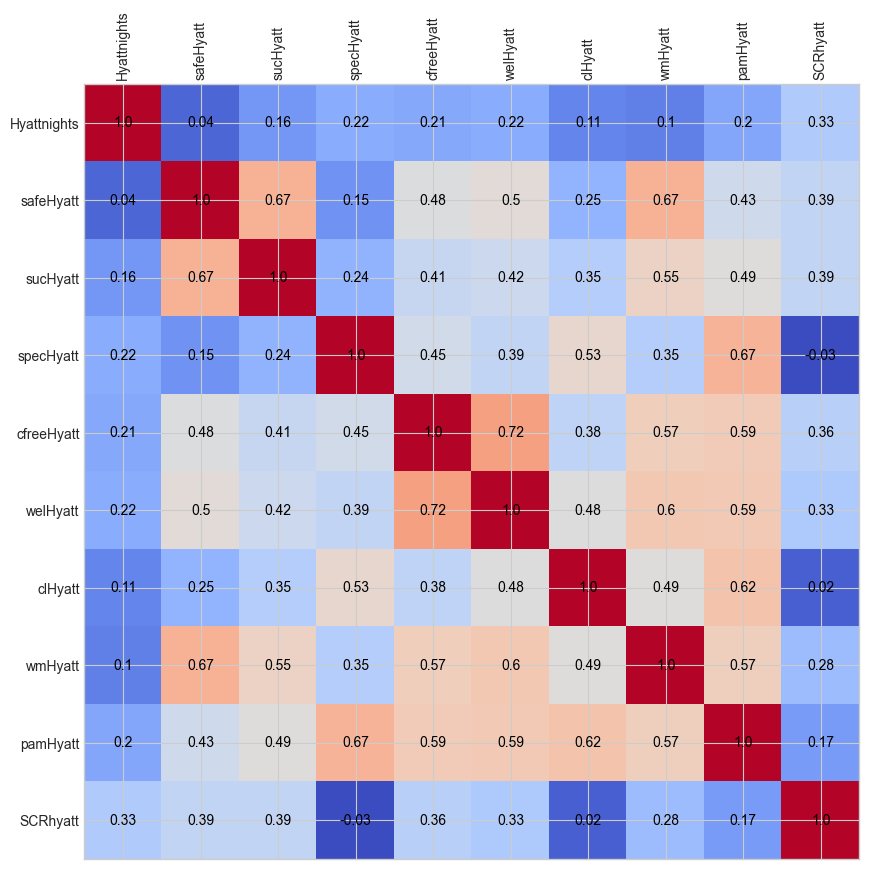

SCRhyatt       1.00
safeHyatt      0.39
sucHyatt       0.39
cfreeHyatt     0.36
Hyattnights    0.33
welHyatt       0.33
wmHyatt        0.28
pamHyatt       0.17
clHyatt        0.02
specHyatt     -0.03
Name: SCRhyatt, dtype: float64

In [9]:
hyatt_corr = hyatt_df.corr(numeric_only=True)
ajr_correlation_heatmap(hyatt_corr, fig_height=10)
hyatt_corr["SCRhyatt"].sort_values(ascending=False)


Quick hits:
- Hyatt sentiment items move tightly together (above 0.6 correlations) and stay experiences skew toward mid-to-high satisfaction.
- Hilton scores look slightly higher than Hyatt on average, but distributions are similarly skewed.
- Missing values cluster heavily inside the survey metadata columns (see the null overview for targets to clean).